In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os


import pandas as pd
import seaborn
import math
import sklearn
import datetime
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import itertools
from sklearn import tree

In [2]:
orig=pd.read_csv("data.csv")
orig.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
orig2=orig[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]



In [4]:
X = orig2.drop("diagnosis", axis=1)
y = orig2["diagnosis"]
print(X.shape, y.shape)

(569, 31) (569,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [6]:
len(X_train),len(X_test)

(426, 143)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
classifier.fit(X_train, y_train)

C:\Users\madas\.conda\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
classifier.coef_.flatten()

array([-9.36364778e-10, -2.54013761e-04, -4.64957355e-04, -1.55077502e-03,
       -2.45736087e-03, -2.61093392e-06, -7.70203340e-07,  1.48829101e-06,
        7.75592267e-07, -4.92813403e-06, -1.95596432e-06, -1.55971603e-06,
       -3.78921956e-05, -8.81545913e-06,  4.73909145e-04, -2.25034380e-07,
       -3.75856334e-07, -4.05761948e-07, -1.65689186e-07, -6.32282892e-07,
       -1.00808618e-07, -2.36001542e-04, -5.82395791e-04, -1.43290995e-03,
        2.41535531e-03, -3.35360884e-06, -6.24606050e-07,  2.23649769e-06,
        4.31958654e-07, -7.00893084e-06, -2.14028721e-06])

In [10]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8356807511737089
Testing Data Score: 0.8111888111888111


In [35]:
import numpy as np 

def analyze_coef(df_with_cols,model,num_points):
    feat = df_with_cols.columns
    coef = model.coef_.flatten()
    sort_i = np.argsort(-np.abs(coef))
    print(coef)
    
        

    n_plot = num_points
    ind = np.arange(n_plot)
    plt.figure(figsize=(40,10))
    plt.xticks(rotation=90)
    plt.scatter(ind, coef[sort_i][:n_plot])
    
    plt.xticks(ind, feat[sort_i][:n_plot], rotation=90);
    plt.title("Top coefficients for logistic model")
    plt.ylabel("coefficient");
    
    plt.tight_layout()

[-9.36364778e-10 -2.54013761e-04 -4.64957355e-04 -1.55077502e-03
 -2.45736087e-03 -2.61093392e-06 -7.70203340e-07  1.48829101e-06
  7.75592267e-07 -4.92813403e-06 -1.95596432e-06 -1.55971603e-06
 -3.78921956e-05 -8.81545913e-06  4.73909145e-04 -2.25034380e-07
 -3.75856334e-07 -4.05761948e-07 -1.65689186e-07 -6.32282892e-07
 -1.00808618e-07 -2.36001542e-04 -5.82395791e-04 -1.43290995e-03
  2.41535531e-03 -3.35360884e-06 -6.24606050e-07  2.23649769e-06
  4.31958654e-07 -7.00893084e-06 -2.14028721e-06]


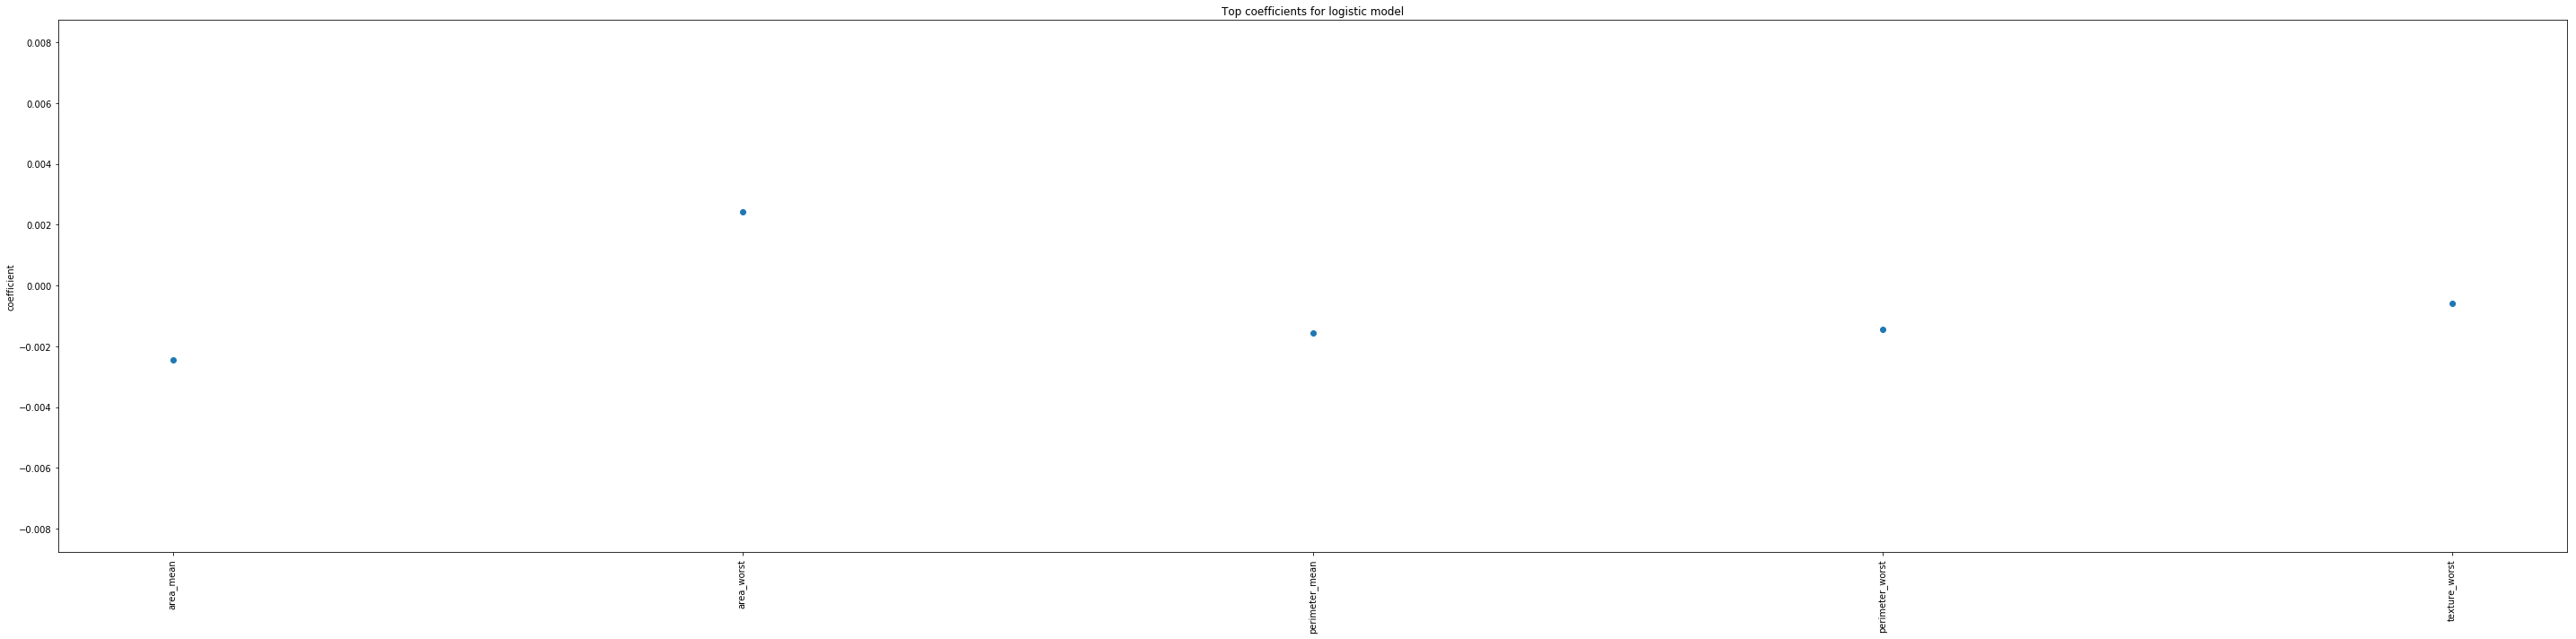

In [36]:
analyze_coef(X_train,classifier,5)
plt.savefig('logistic.png')

In [19]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

NameError: name 'model' is not defined

In [20]:
def classify(model,X_test,X_train,y_train):
    """predicts y first, classify, """
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test,y_pred))
#     print(model.score(*Xy_test))
    print(metrics.confusion_matrix(y_test, y_pred))
    return metrics.confusion_matrix(y_test, y_pred)

In [21]:
confusion_matrix=classify(classifier,X_test,X_train,y_train)

              precision    recall  f1-score   support

           B       0.91      0.78      0.84        90
           M       0.70      0.87      0.77        53

   micro avg       0.81      0.81      0.81       143
   macro avg       0.80      0.82      0.81       143
weighted avg       0.83      0.81      0.81       143

[[70 20]
 [ 7 46]]


In [22]:
confusion_matrix

array([[70, 20],
       [ 7, 46]], dtype=int64)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Biostats',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Test')
    plt.xlabel('Disease')

Confusion matrix, without normalization
[[70 20]
 [ 7 46]]


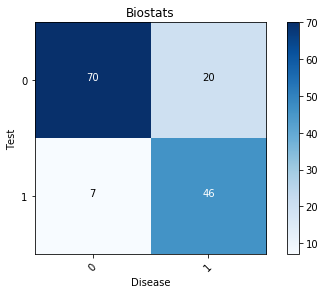

In [34]:
plot_confusion_matrix(confusion_matrix,[0,1])
plt.savefig('cm1.png')

In [18]:
(46+70)/(46+20+7+70)

0.8111888111888111

In [42]:
sensitivity=70/77; specificty=46/66; PPV=70/90

In [43]:
sensitivity,specificty,PPV

(0.9090909090909091, 0.696969696969697, 0.7777777777777778)